In [47]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage


import pandas as pd
import os
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)



In [59]:
data = pd.read_csv('CC GENERAL.csv',sep=",")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [78]:
data.shape


(8636, 18)

In [61]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [62]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [63]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [64]:
nulls_summary = pd.DataFrame(data.isnull().any(), columns=['Nulls'])   
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(data.isnull().sum())   
nulls_summary['Num_of_nulls [%]'] = round((data.isnull().mean()*100),2)   
print(nulls_summary) 

                                  Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
CUST_ID                           False                   0              0.00
BALANCE                           False                   0              0.00
BALANCE_FREQUENCY                 False                   0              0.00
PURCHASES                         False                   0              0.00
ONEOFF_PURCHASES                  False                   0              0.00
INSTALLMENTS_PURCHASES            False                   0              0.00
CASH_ADVANCE                      False                   0              0.00
PURCHASES_FREQUENCY               False                   0              0.00
ONEOFF_PURCHASES_FREQUENCY        False                   0              0.00
PURCHASES_INSTALLMENTS_FREQUENCY  False                   0              0.00
CASH_ADVANCE_FREQUENCY            False                   0              0.00
CASH_ADVANCE_TRX                  False                   0     

In [65]:
data.dropna(axis=0, inplace=True)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [66]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [127]:
data.dropna(axis='index', inplace=True)

In [ ]:
from sklearn.preprocessing import StandarScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

In [129]:
hier_cluster=linkage(data_scaled,method='ward')

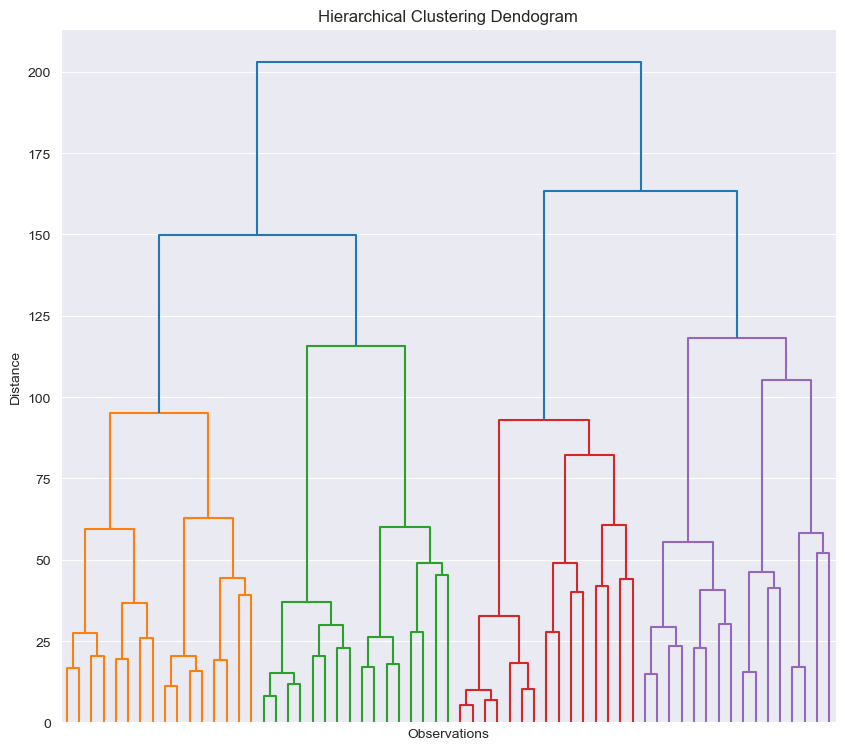

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster,truncate_mode='level',p=5,show_leaf_counts=False,no_labels=True)
plt.show()

In [71]:
#we have 4 general clusters over our data The easiest observation from our dendrogram is having around 4 clades.
#Above a height of 125, if draw a horizontal line, we have 4 general clusters over our data.
#K-Means Clustering + PCA
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

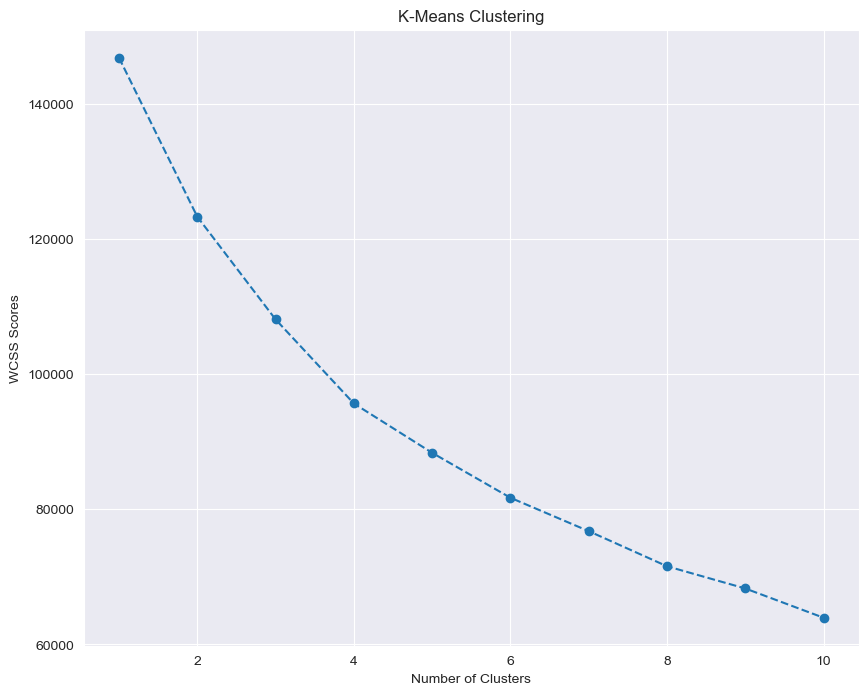

In [72]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()

In [73]:
#To make a judegement based on the dendrogram and our within cluster sum of squares metric,
#we can run another kmeans with 4 clusters and plot our result. 
#It's a little more difficult to judge since we don't have a definite 'elbow' here.

In [74]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(data_scaled)

C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=3)

In [ ]:
#Based on these different segments of groups, we can attempt to make inferences on the groups and assign names to them.

In [90]:
#Can contort names again if we dig out more granular details. 
#Segment 2 also has high minimum purchases.

#Middle Ground seems to be within the range of the other 3 segments, which inspired its name.

data_transf_kmeans.rename({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 2:'High Cash Advance Users', 
                           3:'Frugal Credit Users'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
Middle Ground,4654.668634,0.969185,504.585671,319.242797,185.430900,4588.716197,0.290148,0.139707,0.187588,0.487532,14.457143,7.752381,7648.099174,3556.710634,2038.647135,0.035357,11.385281
High Credit Frequent Purchasers,914.398598,0.946186,1264.766249,611.185037,653.862529,218.782441,0.887337,0.302426,0.713626,0.043855,0.816880,22.507313,4255.521101,1373.920198,649.503571,0.274251,11.601158
High Cash Advance Users,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
Frugal Credit Users,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106


In [95]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Middle Ground', 1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 3:'Frugal Credit Users'})

In [96]:
data_kmeans.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,3,Frugal Credit Users
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Middle Ground
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1,High Credit Frequent Purchasers
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,3,Frugal Credit Users
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,High Credit Frequent Purchasers


In [107]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
X= data.iloc[:, [3,13]].values

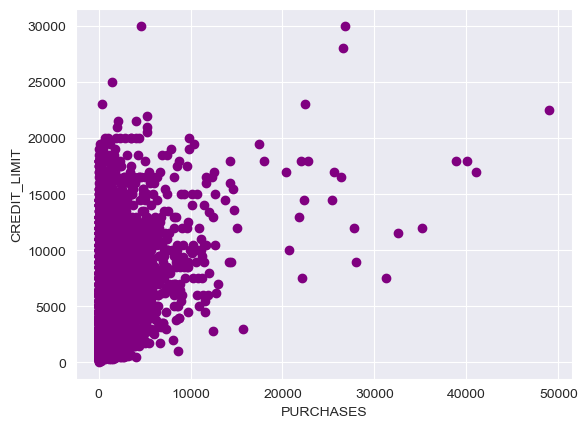

In [114]:
#Visualise data points
plt.scatter(X[:,0],X[:,1],c= 'purple')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.show()

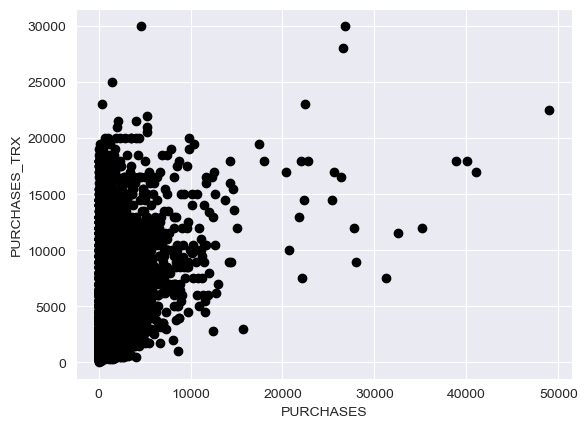

In [111]:
X= data.iloc[:, [3,13]].values
plt.scatter(X[:,0],X[:,1],c='black')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_TRX')
plt.show()

In [115]:
kmeansmodel = KMeans(n_clusters= 4)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans.cluster_centers_

C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 1.45717807,  0.3570326 , -0.24035644, -0.16960984, -0.25666667,
         1.69447064, -0.51302857, -0.22064562, -0.45527657,  1.73420755,
         1.61213161, -0.28916355,  0.85432735,  0.60908963,  0.49499572,
        -0.41838072, -0.11374525],
       [-0.32777031,  0.24629015,  0.110445  ,  0.00373089,  0.25405692,
        -0.3655212 ,  0.9752962 ,  0.32168527,  0.8661934 , -0.46461214,
        -0.36125583,  0.2968377 , -0.07285265, -0.14110257, -0.0905407 ,
         0.38800149,  0.05093181],
       [ 0.94725379,  0.44204179,  3.13368328,  2.72510988,  2.40101347,
        -0.15836507,  1.11798124,  1.77123784,  1.05044595, -0.33091934,
        -0.17576897,  2.99116134,  1.43570613,  1.94854361,  0.48550917,
         0.44737966,  0.31645831],
       [-0.25769159, -0.36658644, -0.34679106, -0.23391293, -0.38984603,
        -0.18267469, -0.80127693, -0.39390094, -0.71770776, -0.09139828,
        -0.15955779, -0.4779908 , -0.34515477, -0.26494772, -0.12243262,
        -0.25399704

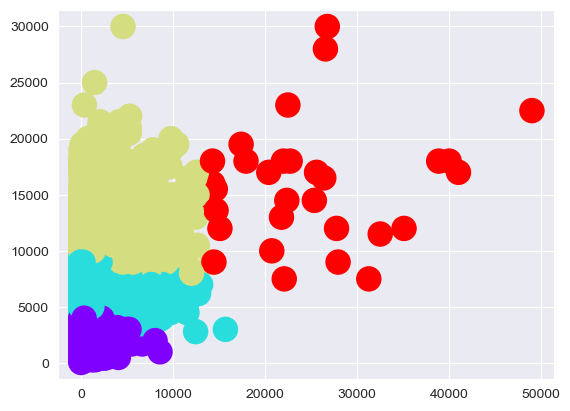

In [116]:
plt.scatter(X[:, 0], X[:, 1], s = 300, c = y_kmeans, cmap='rainbow')

In [117]:
kmeansmodel = KMeans(n_clusters= 3)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans.cluster_centers_

C:\Users\HP\anaconda31\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 1.45717807,  0.3570326 , -0.24035644, -0.16960984, -0.25666667,
         1.69447064, -0.51302857, -0.22064562, -0.45527657,  1.73420755,
         1.61213161, -0.28916355,  0.85432735,  0.60908963,  0.49499572,
        -0.41838072, -0.11374525],
       [-0.32777031,  0.24629015,  0.110445  ,  0.00373089,  0.25405692,
        -0.3655212 ,  0.9752962 ,  0.32168527,  0.8661934 , -0.46461214,
        -0.36125583,  0.2968377 , -0.07285265, -0.14110257, -0.0905407 ,
         0.38800149,  0.05093181],
       [ 0.94725379,  0.44204179,  3.13368328,  2.72510988,  2.40101347,
        -0.15836507,  1.11798124,  1.77123784,  1.05044595, -0.33091934,
        -0.17576897,  2.99116134,  1.43570613,  1.94854361,  0.48550917,
         0.44737966,  0.31645831],
       [-0.25769159, -0.36658644, -0.34679106, -0.23391293, -0.38984603,
        -0.18267469, -0.80127693, -0.39390094, -0.71770776, -0.09139828,
        -0.15955779, -0.4779908 , -0.34515477, -0.26494772, -0.12243262,
        -0.25399704

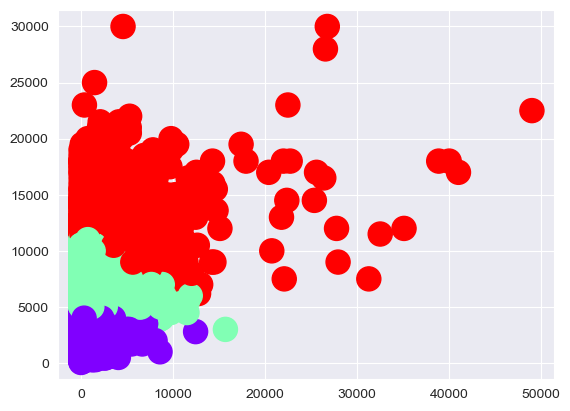

In [118]:
plt.scatter(X[:, 0], X[:, 1], s = 300, c = y_kmeans, cmap='rainbow')

In [119]:
#Compare Results:

#Compare the clusters identified by hierarchical and K-means clustering. 
#These may provide different perspectives on customer segmentation.

# Further Analysis and Marketing Strategy:

##With the identified customer segments, you can analyze each segment's characteristics and tailor marketing 
#strategies based on the behavioral patterns observed within each group.

#Remember that the choice of the number of clusters and the specific variables to use for clustering may vary depending
#on your business objectives and the insights you want to gain from your data.

In [124]:


# Calculate the silhouette score for your clustered data

#The silhouette_score function calculates the average silhouette score for all data points in your dataset.
#A higher silhouette score indicates better-defined clusters, and a score close to 1 suggests strong clustering.
#You can use this score to evaluate the quality of your clusters and compare different clustering algorithms or
#hyperparameters.







